In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

#avoid warning messages
warnings.filterwarnings('ignore')

In [ ]:
# read dataset from a Google Drive File

file_link = 'https://drive.google.com/file/d/1qwXNADavPRDgzS8qDeHXiJ1HBirKnR6o/view' # the file access must have to be Public

# get the id part of the file
id = file_link.split("/")[-2]
# print(id)

# creating a new link using the id so that we can easily read the csv file in pandas
new_link = f'https://drive.google.com/uc?id={id}'
print(new_link)
df = pd.read_csv(new_link)

# let's look at the first few instances
df.head()

https://drive.google.com/uc?id=1qwXNADavPRDgzS8qDeHXiJ1HBirKnR6o


,Rainfall_mm,River_Level_m,Soil_Moisture_%,City,Flood_Risk,Evacuation_Required
0,102.0,2.08,73.4,Suburban,Moderate,1
1,270.0,3.25,47.1,Suburban,High,1
2,106.0,0.61,19.6,Urban,High,0
3,71.0,1.02,35.8,Urban,Low,0
4,188.0,1.07,60.5,Suburban,Low,0


In [ ]:
df.shape

(5050, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5050 entries, 0 to 5049
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rainfall_mm          4846 non-null   float64
 1   River_Level_m        4847 non-null   float64
 2   Soil_Moisture_%      4847 non-null   float64
 3   City                 5050 non-null   object 
 4   Flood_Risk           5050 non-null   object 
 5   Evacuation_Required  5050 non-null   int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 236.8+ KB


In [ ]:
df.describe(include='all')

,Rainfall_mm,River_Level_m,Soil_Moisture_%,City,Flood_Risk,Evacuation_Required
count,4846.000000,4847.000000,4847.000000,5050,5050,5050.000000
unique,NaN,NaN,NaN,3,3,NaN
top,NaN,NaN,NaN,Rural,High,NaN
freq,NaN,NaN,NaN,1734,1721,NaN
mean,149.578828,2.753600,44.984836,NaN,NaN,0.484356
std,85.965509,1.297511,20.077821,NaN,NaN,0.499805
min,0.000000,0.500000,10.000000,NaN,NaN,0.000000
25%,75.000000,1.655000,27.900000,NaN,NaN,0.000000
50%,149.000000,2.770000,45.200000,NaN,NaN,0.000000
75%,223.000000,3.870000,62.000000,NaN,NaN,1.000000


In [ ]:
# Check Unique Values
df.nunique()

,0
Rainfall_mm,300
River_Level_m,451
Soil_Moisture_%,701
City,3
Flood_Risk,3
Evacuation_Required,2


In [ ]:
# Check for missing values
df.isnull().sum()

,0
Rainfall_mm,204
River_Level_m,203
Soil_Moisture_%,203
City,0
Flood_Risk,0
Evacuation_Required,0


In [ ]:
#check the cat and num column name
cat_cols=df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
['City', 'Flood_Risk']
Numerical Variables:
['Rainfall_mm', 'River_Level_m', 'Soil_Moisture_%', 'Evacuation_Required']


Evacuation_Required
0    2604
1    2446
Name: count, dtype: int64


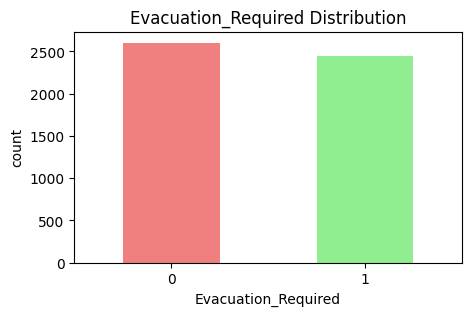

In [ ]:
# Visualize the distribution of the 'Evacuation_Required' variable

print(df.value_counts('Evacuation_Required'))

plt.figure(figsize=(5, 3))
df['Evacuation_Required'].value_counts().plot(kind='bar', color=['lightcoral', 'lightgreen'])
plt.title('Evacuation_Required Distribution')
plt.xlabel('Evacuation_Required')
plt.ylabel('count')
plt.xticks(rotation = 0)
plt.show()

Rainfall_mm
0.0      16
1.0      14
2.0      17
3.0      14
4.0      22
         ..
295.0    15
296.0     5
297.0    11
298.0     9
299.0     9
Name: count, Length: 300, dtype: int64


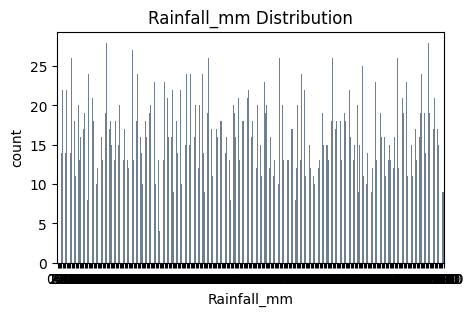

In [ ]:
# Visualize the distribution of 'Rainfall_mm' variable
print(df.value_counts('Rainfall_mm').sort_index())

plt.figure(figsize=(5, 3))
df['Rainfall_mm'].value_counts().sort_index().plot(kind='bar', color='slategrey')
plt.title('Rainfall_mm Distribution')
plt.xlabel('Rainfall_mm')
plt.ylabel('count')
plt.xticks(rotation=0)
plt.show()

River_Level_m
3.60    21
0.75    20
2.81    20
2.50    19
4.70    19
        ..
2.14     3
2.17     3
4.64     3
0.50     3
1.53     2
Name: count, Length: 451, dtype: int64


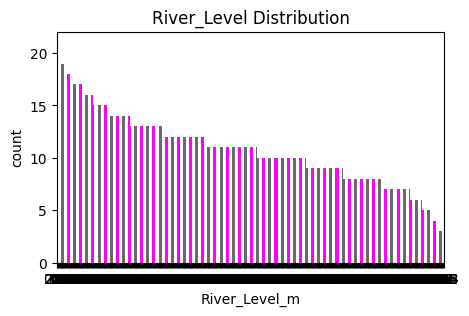

In [ ]:
# Visualize the distribution of 'River_Level_m' variable
print(df.value_counts('River_Level_m'))

plt.figure(figsize=(5, 3))
df['River_Level_m'].value_counts().plot(kind='bar', color=['dimgray', 'magenta'])
plt.title('River_Level Distribution')
plt.xlabel('River_Level_m')
plt.ylabel('count')
plt.xticks(rotation=0)
plt.show()

Soil_Moisture_%
27.7    17
31.8    16
39.6    14
51.6    14
32.2    14
        ..
69.4     1
18.7     1
21.9     1
32.0     1
65.6     1
Name: count, Length: 701, dtype: int64


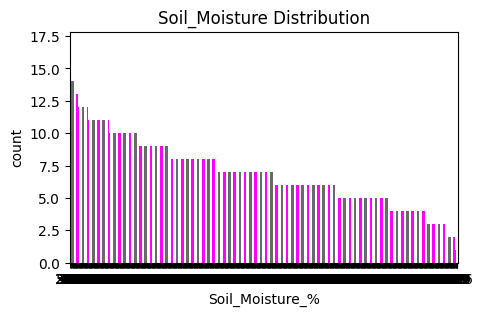

In [ ]:
# Visualize the distribution of 'Soil_Moisture_' variable
print(df.value_counts('Soil_Moisture_%'))

plt.figure(figsize=(5, 3))
df['Soil_Moisture_%'].value_counts().plot(kind='bar', color=['dimgray', 'magenta'])
plt.title('Soil_Moisture Distribution')
plt.xlabel('Soil_Moisture_%')
plt.ylabel('count')
plt.xticks(rotation=0)
plt.show()

Flood_Risk
High        1721
Low         1692
Moderate    1637
Name: count, dtype: int64


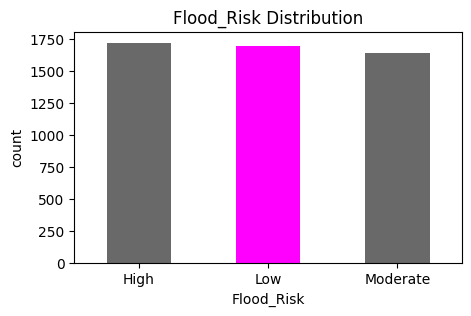

In [ ]:
# Visualize the distribution of 'Flood_Risk' variable
print(df.value_counts('Flood_Risk'))

plt.figure(figsize=(5, 3))
df['Flood_Risk'].value_counts().plot(kind='bar', color=['dimgray', 'magenta'])
plt.title('Flood_Risk Distribution')
plt.xlabel('Flood_Risk')
plt.ylabel('count')
plt.xticks(rotation=0)
plt.show()

City
Rural       1734
Urban       1662
Suburban    1654
Name: count, dtype: int64


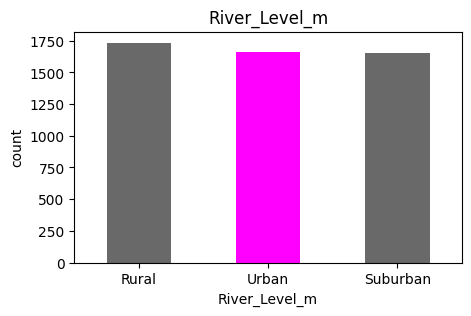

In [ ]:
# Visualize the distribution of 'City' variable
print(df.value_counts('City'))

plt.figure(figsize=(5, 3))
df['City'].value_counts().plot(kind='bar', color=['dimgray', 'magenta'])
plt.title('River_Level_m')
plt.xlabel('River_Level_m')
plt.ylabel('count')
plt.xticks(rotation=0)
plt.show()

<Figure size 600x400 with 0 Axes>

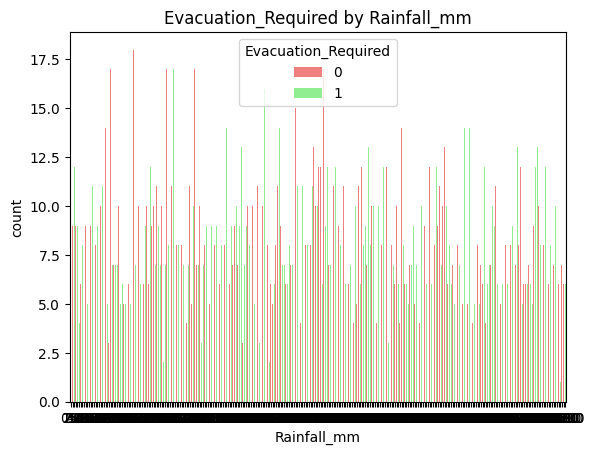

In [ ]:
# Visualize the relationship between 'Evacuation_Required' and 'Rainfall_mm'

plt.figure(figsize=(6, 4))
pd.crosstab(df['Rainfall_mm'], df['Evacuation_Required']).plot(kind='bar', color=['lightcoral', 'lightgreen'])
plt.title('Evacuation_Required by Rainfall_mm')
plt.xlabel('Rainfall_mm')
plt.ylabel('count')
plt.xticks(rotation=0)
plt.show()

<Figure size 600x400 with 0 Axes>

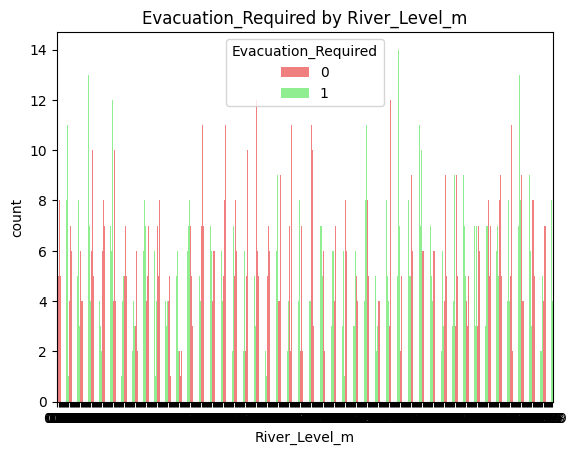

In [ ]:
# Visualize the relationship between 'Evacuation_Required' and 'River_Level_m'
plt.figure(figsize=(6, 4))
pd.crosstab(df['River_Level_m'], df['Evacuation_Required']).plot(kind='bar', color=['lightcoral', 'lightgreen'])
plt.title('Evacuation_Required by River_Level_m')
plt.xlabel('River_Level_m')
plt.ylabel('count')
plt.xticks(rotation=0)
plt.show()

<Figure size 600x400 with 0 Axes>

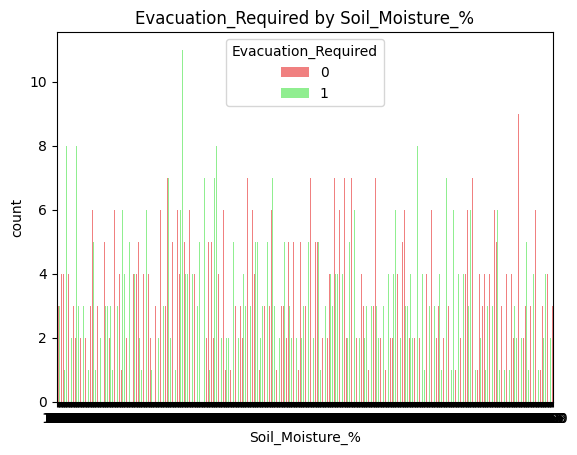

In [ ]:
# Visualize the relationship between 'Evacuation_Required' and 'Soil_Moisture_'
plt.figure(figsize=(6, 4))
pd.crosstab(df['Soil_Moisture_%'], df['Evacuation_Required']).plot(kind='bar', color=['lightcoral', 'lightgreen'])
plt.title('Evacuation_Required by Soil_Moisture_%')
plt.xlabel('Soil_Moisture_%')
plt.ylabel('count')
plt.xticks(rotation=0)
plt.show()

<Figure size 600x400 with 0 Axes>

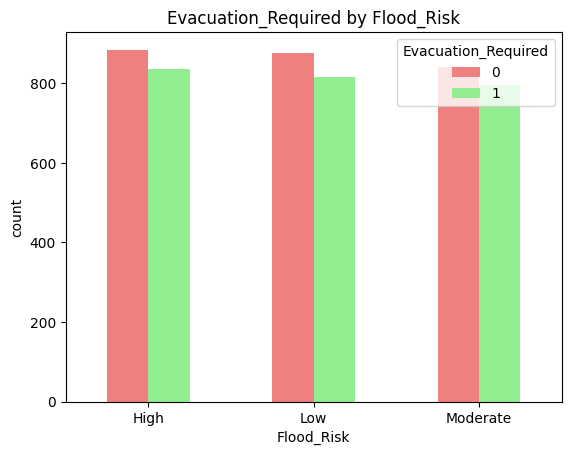

In [ ]:
# Visualize the relationship between 'Evacuation_Required' and 'Flood_Risk'
plt.figure(figsize=(6, 4))
pd.crosstab(df['Flood_Risk'], df['Evacuation_Required']).plot(kind='bar', color=['lightcoral', 'lightgreen'])
plt.title('Evacuation_Required by Flood_Risk')
plt.xlabel('Flood_Risk')
plt.ylabel('count')
plt.xticks(rotation=0)
plt.show()

                     Rainfall_mm  River_Level_m  Soil_Moisture_%  \
Rainfall_mm             1.000000       0.001365         0.019123   
River_Level_m           0.001365       1.000000        -0.018827   
Soil_Moisture_%         0.019123      -0.018827         1.000000   
Evacuation_Required     0.039257       0.002133         0.020142   

                     Evacuation_Required  
Rainfall_mm                     0.039257  
River_Level_m                   0.002133  
Soil_Moisture_%                 0.020142  
Evacuation_Required             1.000000  


<Figure size 800x600 with 0 Axes>

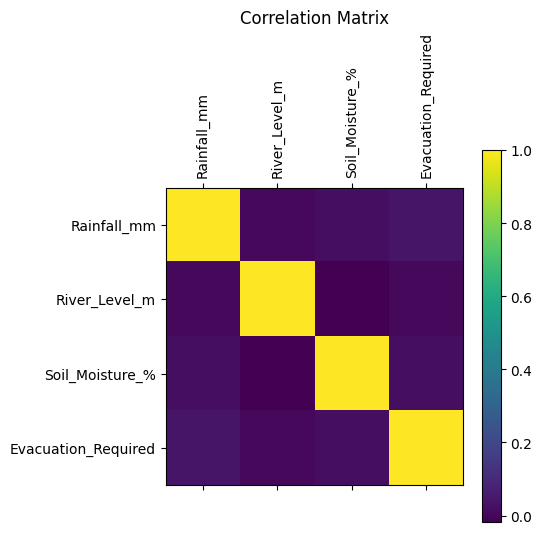

In [ ]:
# Correlation matrix plot
plt.figure(figsize=(8, 6))
correlation_matrix = df.corr(numeric_only=True)
print(correlation_matrix)
plt.matshow(correlation_matrix)
plt.title('Correlation Matrix')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.colorbar()
plt.show()

# Data Preprocessing

In [ ]:
# Drop redundant features
df = df.drop(['City'], axis=1) #axis=1 is column, 0 is row
df

,Rainfall_mm,River_Level_m,Soil_Moisture_%,Flood_Risk,Evacuation_Required
0,102.0,2.08,73.4,Moderate,1
1,270.0,3.25,47.1,High,1
2,106.0,0.61,19.6,High,0
3,71.0,1.02,35.8,Low,0
4,188.0,1.07,60.5,Low,0
...,...,...,...,...,...
5045,27.0,0.96,36.9,Low,0
5046,102.0,NaN,49.6,Moderate,0
5047,69.0,2.89,55.7,High,1
5048,194.0,1.27,16.6,Low,0


In [ ]:
# Drop duplicates
df = df.drop_duplicates()
df

,Rainfall_mm,River_Level_m,Soil_Moisture_%,Flood_Risk,Evacuation_Required
0,102.0,2.08,73.4,Moderate,1
1,270.0,3.25,47.1,High,1
2,106.0,0.61,19.6,High,0
3,71.0,1.02,35.8,Low,0
4,188.0,1.07,60.5,Low,0
...,...,...,...,...,...
4995,246.0,4.30,69.2,High,1
4996,28.0,1.30,32.7,High,1
4997,160.0,4.57,51.5,Moderate,1
4998,234.0,2.03,47.7,Low,0


In [ ]:
df.shape

(5000, 5)

In [ ]:
# Handle missing values in the column "Soil_Moisture_" by replacing with the mean value
df['Soil_Moisture_%'].fillna(df['Soil_Moisture_%'].mean(), inplace=True) #changing df permanently
df

,Rainfall_mm,River_Level_m,Soil_Moisture_%,Flood_Risk,Evacuation_Required
0,102.0,2.08,73.4,Moderate,1
1,270.0,3.25,47.1,High,1
2,106.0,0.61,19.6,High,0
3,71.0,1.02,35.8,Low,0
4,188.0,1.07,60.5,Low,0
...,...,...,...,...,...
4995,246.0,4.30,69.2,High,1
4996,28.0,1.30,32.7,High,1
4997,160.0,4.57,51.5,Moderate,1
4998,234.0,2.03,47.7,Low,0


In [ ]:
# Handle missing values in the column "Age" by replacing with the mean value
df['River_Level_m'].fillna(df['River_Level_m'].mean(), inplace=True) #changing df permanently
df

,Rainfall_mm,River_Level_m,Soil_Moisture_%,Flood_Risk,Evacuation_Required
0,102.0,2.08,73.4,Moderate,1
1,270.0,3.25,47.1,High,1
2,106.0,0.61,19.6,High,0
3,71.0,1.02,35.8,Low,0
4,188.0,1.07,60.5,Low,0
...,...,...,...,...,...
4995,246.0,4.30,69.2,High,1
4996,28.0,1.30,32.7,High,1
4997,160.0,4.57,51.5,Moderate,1
4998,234.0,2.03,47.7,Low,0


In [ ]:
# Drop rows with missing values
df.dropna(subset=['Rainfall_mm'], inplace=True)
df

,Rainfall_mm,River_Level_m,Soil_Moisture_%,Flood_Risk,Evacuation_Required
0,102.0,2.08,73.4,Moderate,1
1,270.0,3.25,47.1,High,1
2,106.0,0.61,19.6,High,0
3,71.0,1.02,35.8,Low,0
4,188.0,1.07,60.5,Low,0
...,...,...,...,...,...
4995,246.0,4.30,69.2,High,1
4996,28.0,1.30,32.7,High,1
4997,160.0,4.57,51.5,Moderate,1
4998,234.0,2.03,47.7,Low,0


In [ ]:
df.shape

(4800, 5)

In [ ]:
df.isnull().sum()

,0
Rainfall_mm,0
River_Level_m,0
Soil_Moisture_%,0
Flood_Risk,0
Evacuation_Required,0


In [ ]:
# Convert categorical variables to numerical (one-hot encoding)
df = pd.get_dummies(df, columns=['Flood_Risk'])
df

,Rainfall_mm,River_Level_m,Soil_Moisture_%,Evacuation_Required,Flood_Risk_High,Flood_Risk_Low,Flood_Risk_Moderate
0,102.0,2.08,73.4,1,False,False,True
1,270.0,3.25,47.1,1,True,False,False
2,106.0,0.61,19.6,0,True,False,False
3,71.0,1.02,35.8,0,False,True,False
4,188.0,1.07,60.5,0,False,True,False
...,...,...,...,...,...,...,...
4995,246.0,4.30,69.2,1,True,False,False
4996,28.0,1.30,32.7,1,True,False,False
4997,160.0,4.57,51.5,1,False,False,True
4998,234.0,2.03,47.7,0,False,True,False


In [ ]:
df.shape

(4800, 7)

# ***Decision Tree and Random Forest ***

---


In [ ]:
# Split the data into 80-20 train-test split

X = df.drop(['Evacuation_Required'], axis=1)#features
y = df['Evacuation_Required']#target column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1000)

In [ ]:
# display the shapes

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (3840, 6)
X_test shape: (960, 6)
y_train shape: (3840,)
y_test shape: (960,)


Decision Tree Classifier Accuracy: 0.50625
F1 Score for Decision Tree Classifier: 0.4045226130653266


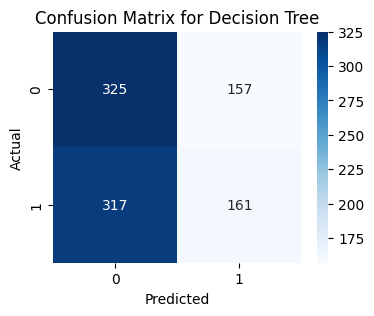

In [ ]:
# Implementing Decision Tree Classifier
decision_tree_model = DecisionTreeClassifier(criterion='gini', max_depth = 10, random_state=1000)
decision_tree_model.fit(X_train, y_train)

# Predictions on the test set
y_pred_dt = decision_tree_model.predict(X_test)

# Evaluate the model
print("Decision Tree Classifier Accuracy:", accuracy_score(y_test, y_pred_dt))
#accuracy = no.of correctly predicted data / total test data

# Calculate the F1 Score
f1 = f1_score(y_test, y_pred_dt, average='binary')

print("F1 Score for Decision Tree Classifier:", f1)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_dt)

# Plot the confusion matrix
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix for Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Random Forest Classifier Accuracy: 0.521875
Confusion Matrix:
 [[384  98]
 [361 117]]
F1 Score: 0.33766233766233766


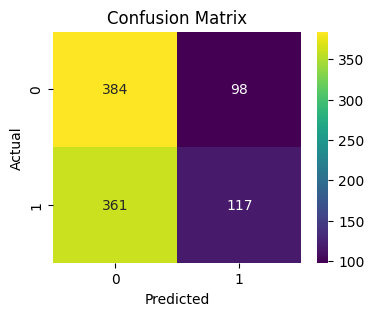

In [ ]:

# Split the data into 80-20 train-test split
X = df.drop(['Evacuation_Required'], axis=1)  # Features
y = df['Evacuation_Required']  # Target column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1000)

# Implementing Random Forest Classifier
random_forest_model = RandomForestClassifier(n_estimators=100, max_depth=5, criterion='gini', bootstrap=True, random_state=1000)
random_forest_model.fit(X_train, y_train)

# Predictions on the test set
y_pred_rf = random_forest_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_rf)
conf_matrix = confusion_matrix(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)

# Output results
print("Random Forest Classifier Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("F1 Score:", f1)

# Plotting the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# ***# Implementing AdaBoost using Scikit-learn Library***

---



In [ ]:
# Split the data into 80-20 train-test split (you can do other ratios as well)
X = df.drop(['Evacuation_Required'], axis=1)
# df['RainTomorrow']= df['RainTomorrow'].replace(0, -1)
y = df['Evacuation_Required']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1000)

In [ ]:
# display the shapes

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (3840, 6)
X_test shape: (960, 6)
y_train shape: (3840,)
y_test shape: (960,)


In [ ]:
abc = AdaBoostClassifier(n_estimators=5,learning_rate=1, random_state = 1000)
model = abc.fit(X_train, y_train)
y_pred = model.predict(X_test)
# plot_adaboost(X, y, model)
print("Accuracy score (training): {0:.3f}".format(model.score(X_train, y_train)))
print("Accuracy score (validation): {0:.3f}".format(model.score(X_test, y_test)))

Accuracy score (training): 0.533
Accuracy score (validation): 0.515


In [ ]:
abc = AdaBoostClassifier(n_estimators=100,learning_rate=0.5, random_state = 1000)
model = abc.fit(X_train, y_train)
y_pred = model.predict(X_test)
# plot_adaboost(X, y, model)
print("Accuracy score (training): {0:.3f}".format(model.score(X_train, y_train)))
print("Accuracy score (validation): {0:.3f}".format(model.score(X_test, y_test)))

Accuracy score (training): 0.541
Accuracy score (validation): 0.521


0.1 5 Accuracy score (training): 0.535
0.1 5 Accuracy score (validation): 0.515


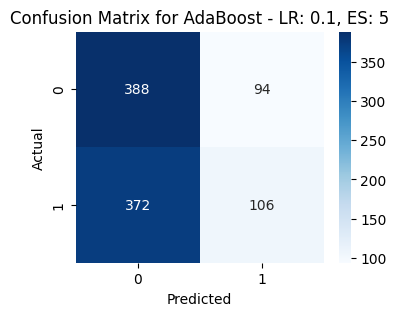

0.1 10 Accuracy score (training): 0.536
0.1 10 Accuracy score (validation): 0.516


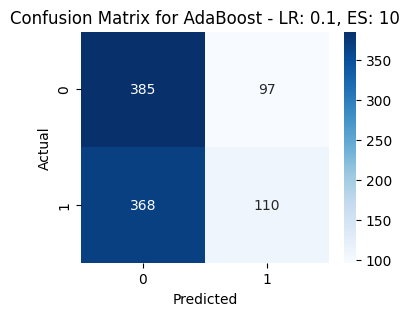

0.1 15 Accuracy score (training): 0.531
0.1 15 Accuracy score (validation): 0.521


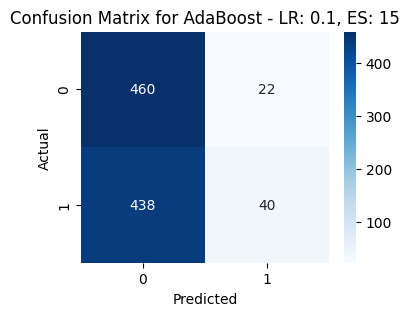

0.3 5 Accuracy score (training): 0.536
0.3 5 Accuracy score (validation): 0.520


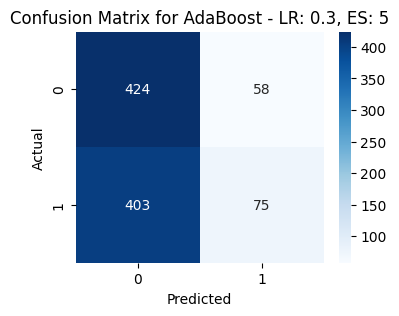

0.3 10 Accuracy score (training): 0.534
0.3 10 Accuracy score (validation): 0.515


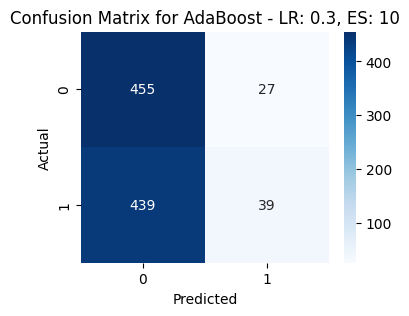

0.3 15 Accuracy score (training): 0.536
0.3 15 Accuracy score (validation): 0.509


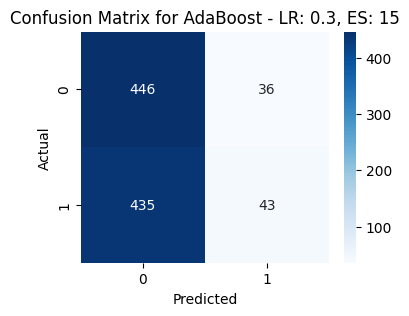

0.4 5 Accuracy score (training): 0.536
0.4 5 Accuracy score (validation): 0.520


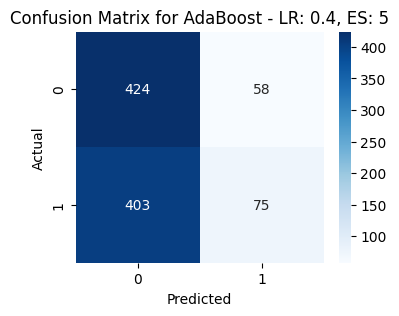

0.4 10 Accuracy score (training): 0.537
0.4 10 Accuracy score (validation): 0.522


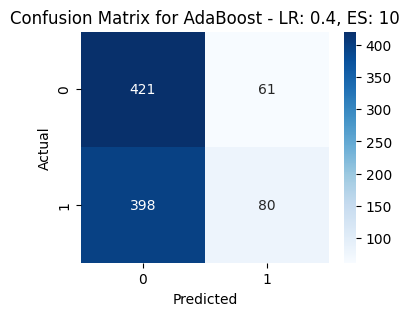

0.4 15 Accuracy score (training): 0.539
0.4 15 Accuracy score (validation): 0.516


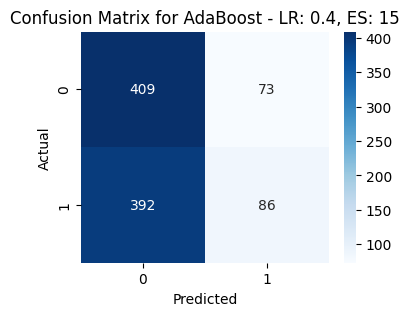

In [ ]:

# Assuming X_train, X_test, y_train, y_test are defined

lr = [0.1, 0.3, 0.4]
es = [5, 10, 15]

for i in lr:
    for j in es:
        abc = AdaBoostClassifier(n_estimators=j, learning_rate=i, random_state=1000)
        model = abc.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Printing accuracy scores
        print(i, j, "Accuracy score (training): {0:.3f}".format(model.score(X_train, y_train)))
        print(i, j, "Accuracy score (validation): {0:.3f}".format(model.score(X_test, y_test)))

        # Generate confusion matrix
        cm = confusion_matrix(y_test, y_pred)

        # Plot the confusion matrix
        plt.figure(figsize=(4, 3))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
        plt.title(f"Confusion Matrix for AdaBoost - LR: {i}, ES: {j}")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.show()



# ***KNN***

---



KNN Classifier Accuracy: 0.5125
Classification Report for KNN:
               precision    recall  f1-score   support

           0       0.51      0.55      0.53       482
           1       0.51      0.47      0.49       478

    accuracy                           0.51       960
   macro avg       0.51      0.51      0.51       960
weighted avg       0.51      0.51      0.51       960



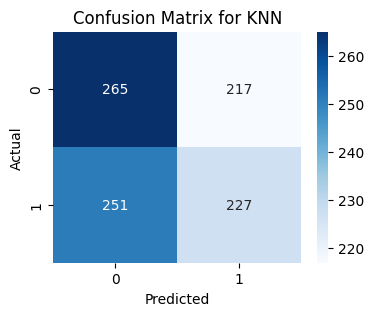

In [ ]:

# Implementing KNN Classifier
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can change the number of neighbors
knn_model.fit(X_train, y_train)

# Predictions on the test set
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
print("KNN Classifier Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report for KNN:\n", classification_report(y_test, y_pred_knn))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_knn)

# Plot the confusion matrix
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix for KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


***SVM***

---



SVM Accuracy: 0.5020833333333333
Confusion Matrix for SVM:
 [[482   0]
 [478   0]]
Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67       482
           1       0.00      0.00      0.00       478

    accuracy                           0.50       960
   macro avg       0.25      0.50      0.33       960
weighted avg       0.25      0.50      0.34       960



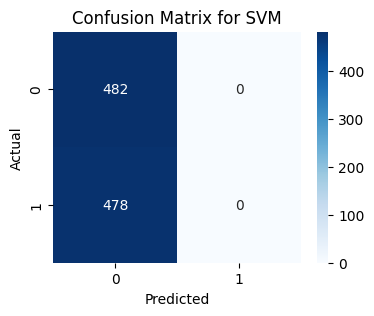

In [ ]:
svm_model = SVC(kernel='linear', C=1)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Confusion Matrix for SVM:\n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report for SVM:\n", classification_report(y_test, y_pred_svm))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_svm)

# Plot the confusion matrix
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix for SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ***ANN***

---



Accuracy: 0.5104166666666666
Classification Report:ANN
               precision    recall  f1-score   support

           0       0.51      0.74      0.60       484
           1       0.51      0.28      0.36       476

    accuracy                           0.51       960
   macro avg       0.51      0.51      0.48       960
weighted avg       0.51      0.51      0.48       960



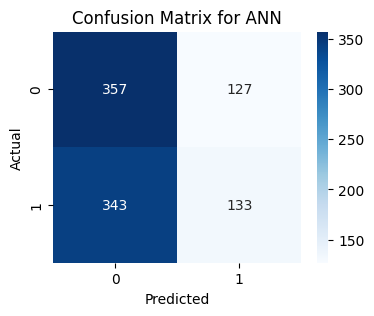

In [ ]:


# Preprocess the dataset
# Assume 'target' is the column name for the output variable
X = df.drop(columns=['Evacuation_Required'])  # Replace 'target' with the actual target column name
y = df['Evacuation_Required']

# Encode categorical labels if needed
# Example: y = pd.get_dummies(y, drop_first=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define and train the ANN model
ann_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=300, random_state=42)
ann_model.fit(X_train, y_train)

# Make predictions
y_pred = ann_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:ANN\n", classification_report(y_test, y_pred))

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix for ANN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


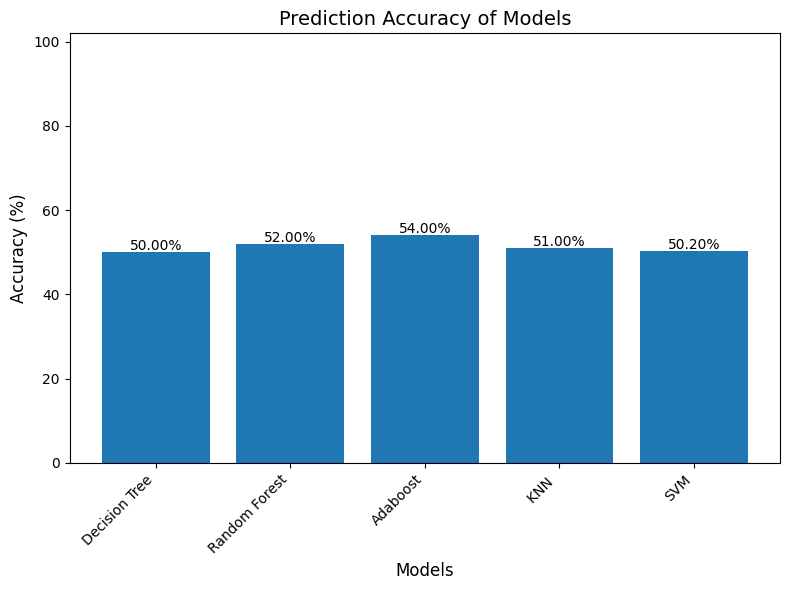

In [ ]:


# Accuracies for each model
dt_accuracy = .50


rf_accuracy = .52

Adaboost= .54

knn_accuracy = .51
SVM=.502

# Combine accuracies into a list
accuracies = [
    dt_accuracy,
    rf_accuracy,
    Adaboost,
    knn_accuracy,
    SVM
]

# Convert accuracies to percentages
accuracies_percent = [acc * 100 for acc in accuracies]

# Model names
model_names = [
    "Decision Tree",
    "Random Forest",
  "Adaboost",
    "KNN ",
    "SVM"
]
# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(model_names, accuracies_percent)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.xlabel('Models', fontsize=12)
plt.title('Prediction Accuracy of Models', fontsize=14)
plt.ylim(0, 102)  # Set y-axis range for better visualization

# Annotate the accuracy values on the bars
for i, acc in enumerate(accuracies_percent):
    plt.text(i, acc + 0.5, f"{acc:.2f}%", ha='center', fontsize=10)

plt.tight_layout()
plt.show()
